In [1]:
import numpy as np
import pandas as pd
import seaborn as scs
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(".././ml_datasets/Iris-f.csv")

In [3]:
df.shape

(150, 5)

In [4]:
df.count()

SepalLengthCm    148
SepalWidthCm     149
PetalLengthCm    149
PetalWidthCm     150
Species          149
dtype: int64

### Checking null values

In [5]:
df.isna()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,True,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [6]:
df.isna().sum()

SepalLengthCm    2
SepalWidthCm     1
PetalLengthCm    1
PetalWidthCm     0
Species          1
dtype: int64

### Row index of missing values

In [7]:
df[df.isna().any(axis=1)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
4,NaN,3.6,1.4,0.2,Iris-setosa
7,5.0,NaN,NaN,0.2,Iris-setosa
10,5.4,3.7,1.5,0.2,NaN
20,NaN,3.4,1.7,0.2,Iris-setosa


In [8]:
df[df.isna().any(axis=1)].index

Index([4, 7, 10, 20], dtype='int64')

In [9]:
df1 = df.copy()

### Droping the row with missing values

In [10]:
df1.dropna(axis=0, inplace=True) 
# inplace reflects changes on the dataset

In [11]:
df1.shape

(146, 5)

In [12]:
df1.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
df1.corr

<bound method DataFrame.corr of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
5              5.4           3.9            1.7           0.4     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[146 rows x 5 columns]>

In [14]:
df1 = df.copy(deep=True)

In [15]:
df1.isna().sum()

SepalLengthCm    2
SepalWidthCm     1
PetalLengthCm    1
PetalWidthCm     0
Species          1
dtype: int64

In [16]:
df1.dropna(axis=0, inplace=True, thresh=4)

In [17]:
df1.isna().sum()

SepalLengthCm    2
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          1
dtype: int64

In [18]:
df1.shape

(149, 5)

In [19]:
df1[df1.isna().any(axis=1)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
4,NaN,3.6,1.4,0.2,Iris-setosa
10,5.4,3.7,1.5,0.2,NaN
20,NaN,3.4,1.7,0.2,Iris-setosa


### Filling with 0

In [20]:

df1.fillna(0, inplace=True)

In [21]:
df1[df1.isna().any(axis=1)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [22]:
df.isna().sum()

SepalLengthCm    2
SepalWidthCm     1
PetalLengthCm    1
PetalWidthCm     0
Species          1
dtype: int64

#### Filling with Median value

In [23]:
df2 = df.copy(deep=True)
df2.isna().sum()
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,NaN,3.6,1.4,0.2,Iris-setosa


In [24]:
med = df2['SepalLengthCm'].median()
med

5.8

In [25]:
df2['SepalLengthCm'].fillna(med, inplace=True)

In [26]:
df2.isna().sum()

SepalLengthCm    0
SepalWidthCm     1
PetalLengthCm    1
PetalWidthCm     0
Species          1
dtype: int64

In [27]:
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.8,3.6,1.4,0.2,Iris-setosa


In [28]:
df[df2.isna().any(axis=1)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
7,5.0,NaN,NaN,0.2,Iris-setosa
10,5.4,3.7,1.5,0.2,NaN


In [29]:
df2.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,149.000000,149.000000,150.000000
mean,5.851333,3.051678,3.773826,1.198667
std,0.824355,0.434120,1.760543,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
df2.iloc[[4,7,10,20], :]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
4,5.8,3.6,1.4,0.2,Iris-setosa
7,5.0,NaN,NaN,0.2,Iris-setosa
10,5.4,3.7,1.5,0.2,NaN
20,5.8,3.4,1.7,0.2,Iris-setosa


In [31]:
df2.isna().sum()

SepalLengthCm    0
SepalWidthCm     1
PetalLengthCm    1
PetalWidthCm     0
Species          1
dtype: int64

In [32]:
# df2.fillna(df.mean(), inplace=True)
df2.isna().sum()
df2


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.8,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
df2['SepalWidthCm'].fillna(df2['SepalWidthCm'].median(), inplace=True)

In [34]:
df2.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    1
PetalWidthCm     0
Species          1
dtype: int64

In [35]:
df2['PetalLengthCm'].fillna(df2['PetalLengthCm'].median(), inplace=True)
df2['Species'].fillna(df2['Species'].mode(), inplace=True)

In [36]:
df2.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          1
dtype: int64

In [37]:
df2['Species'].mode()

0    Iris-versicolor
1     Iris-virginica
Name: Species, dtype: object

In [38]:
df2.Species.fillna(df2['Species'].mode()[0], inplace=True)
df2.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Forward and Backward Values, called Nearest Neighbour Values

In [39]:
df3 = df.copy(deep=True)

In [40]:
df3.isna().sum()

SepalLengthCm    2
SepalWidthCm     1
PetalLengthCm    1
PetalWidthCm     0
Species          1
dtype: int64

In [41]:
df3.fillna(method="ffill", inplace=True)

In [42]:
df3.fillna(method="bfill", inplace=True)

In [43]:
df3.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [44]:
df3.count()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [53]:
corr_matrix = df3.corr(numeric_only=True)
corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.114727,0.873810,0.820623
SepalWidthCm,-0.114727,1.000000,-0.420610,-0.356544
PetalLengthCm,0.873810,-0.420610,1.000000,0.962776
PetalWidthCm,0.820623,-0.356544,0.962776,1.000000


In [46]:
import seaborn as scs

<Axes: >

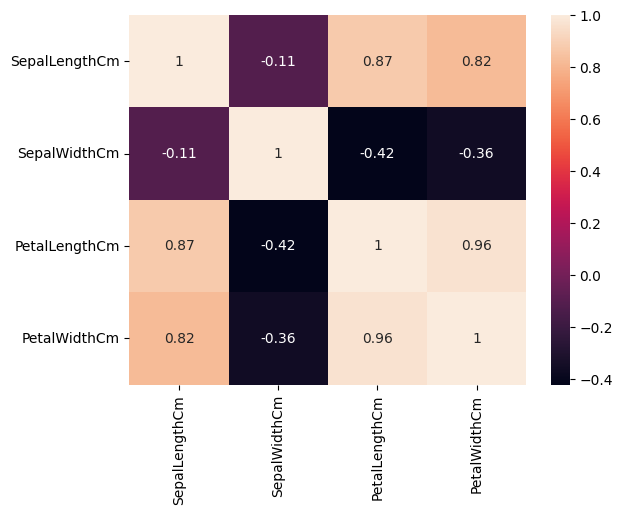

In [52]:
scs.heatmap(data = corr_matrix, annot=True)